In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#Final Plots
#---------------------------------------------------------------------


In [3]:
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes- mc have already a fake run period
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Last_Test.h5", 0, -1)
dfdata= qr_data.getDF()

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5
Selecting events   [ 0 ,  11093908 ]  out of  11093908
number of events: 11093908
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5
Selecting events   [ 0 ,  11093908 ]  out of  11093908
number of events: 11093908
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Last_Test.h5
Selecting events   [ 0 ,  19686714 ]  out of  19686714
number of events: 19686714


In [5]:
qr_mc1.correctAllParallel(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_",n_jobs=30) 
qr_mc2.correctAllParallel(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_",n_jobs=30)       

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [6]:
dfmcEB= qr_mc1.df
dfmcEE= qr_mc2.df 
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')
frame2 = [dfmcEB, dfmcEE] 
data2 = pd.concat(frame2)
dfmc = data2.sample(frac=1).reset_index(drop=True)

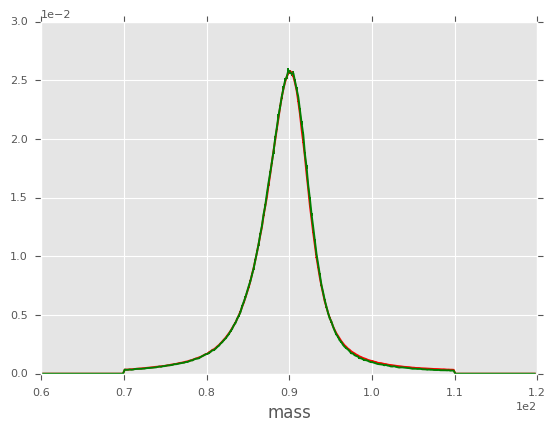

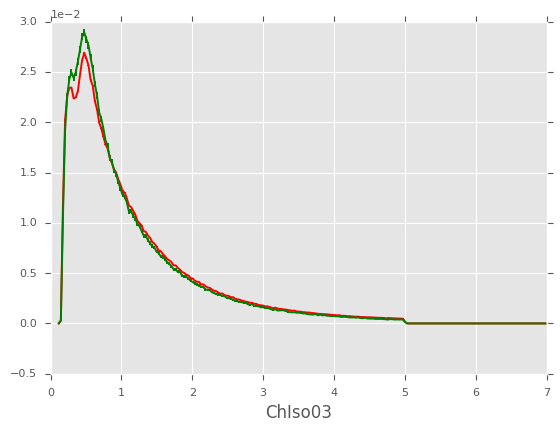

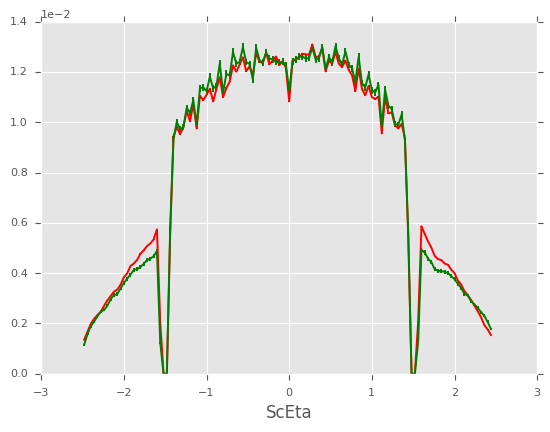

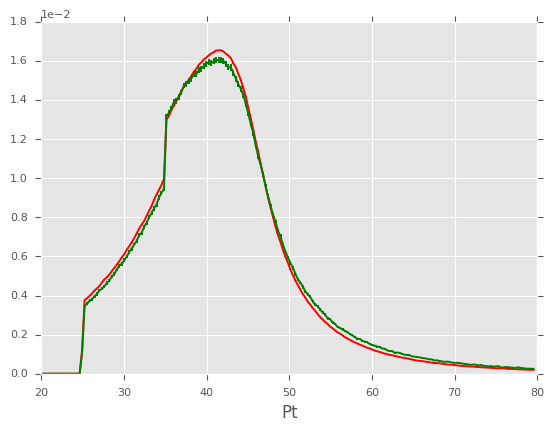

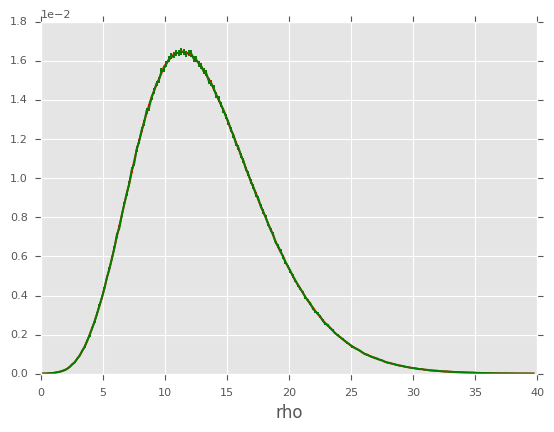

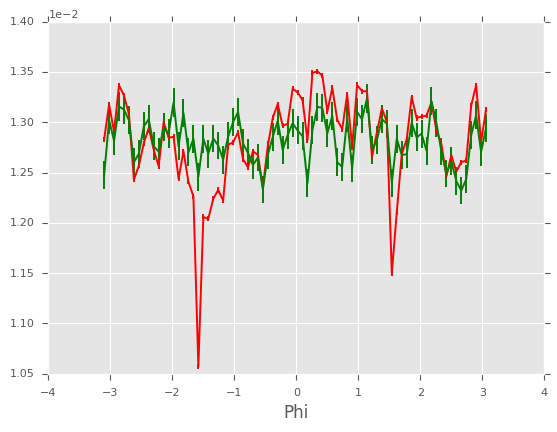

In [25]:
plt.style.use('ggplot')
dfd=dfdata
dfm=dfmc
Xlist=["mass","ChIso03","ScEta","Pt","rho","Phi"]
for yvar in Xlist:
    if yvar=="ScEta": rv=np.arange(-2.5,2.5,0.04)
    if yvar=="Pt":rv=np.arange(20.0,80.0,0.3)
    if yvar=='rho':rv=np.arange(0.0,40.0,0.2)
    if yvar=="Phi":rv=np.arange(-3.14,3.14,0.08)
    if yvar=="mass":rv=np.arange(60.,120.,0.2)
    if yvar=="ChIso03":rv=np.arange(0.1,7.,0.03)
    fig, ax = plt.subplots(dpi=400)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    fig.savefig('FINALPLOTS/'+yvar+'.png', dpi=fig.dpi)

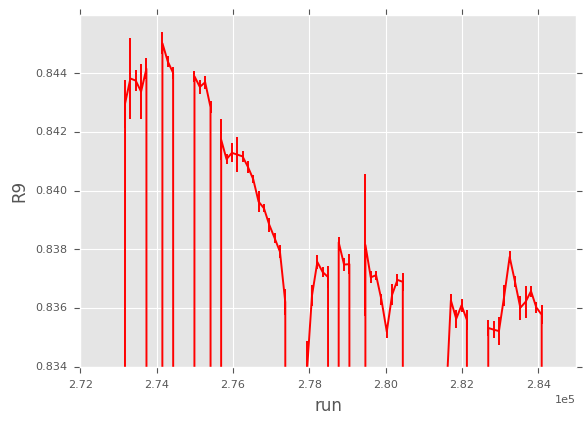

In [24]:
plt.style.use('ggplot')
dfd=dfdata

Xlist=["R9"]#","ChIso03","ScEta","Pt","rho","Phi"]
for yvar in Xlist:
    fig, ax = plt.subplots(dpi=400)
    ax.set_xlabel(yvar)
    ax.set_ylim(0.5,1.0)
    ax.set_xlabel('run')
    ax.set_ylabel(yvar)
    #plot.Profile(dfmc_WithTime['run']  , dfmc_WithTime[yvar]        ,100,271000.,285000.,ax, 'green',dfmc_WithTime["weight"])
    plot.Profile(dfdata['run'], dfdata[yvar],100  ,271000.,285000., 0.5,1.0  ,ax, 'red')
    #ProfileWeighted(dfmc_WithTime['run']  , dfmc_WithTime[yvar+'_corr'],100,271000.,285000.,ax, 'blue',dfmc_WithTime["weight"])
    #ax.set_title('run')
    ax.set_ylim([0.834,0.846])
    ax.set_xlim([272000,285000])
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    fig.savefig('FINALPLOTS/R9time.png', dpi=fig.dpi)

['R9', 'SigmaIeIe']
plotting  R9
plotting  SigmaIeIe


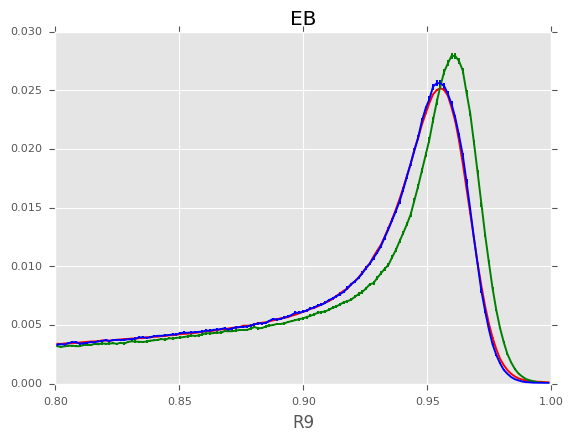

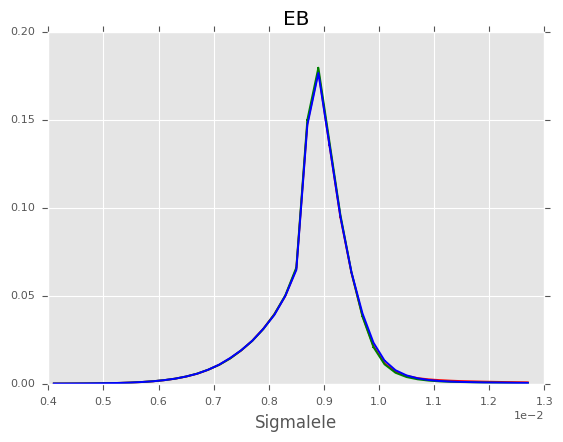

In [29]:
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Integrated_"+sec
section= "section1"
Xlist=["R9","SigmaIeIe"]#","ChIso03","ScEta","Pt","rho","Phi"]
print Xlist
for yvar in Xlist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.arange(0.0,1.0,0.0015)
            rv2 = np.arange(0.8,1.0,0.0015)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv2 = np.arange(0.004,0.013,0.0002)
            #rv2 = np.arange(0.015,0.030,0.0002)
        else:
            rv = np.arange(0.014,0.020,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plot.plotHistErr(dfd[yvar], rv2, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv2,Weight=dfm["weight"], Color="g") 
    plot.plotHistErr(dfm[yvar+"_corr"], rv2,Weight=dfm["weight"], Color="b")
    ax.set_title(sec)
    name= name0+yvar
    fig.savefig('FINALPLOTS/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)
    



['R9', 'SigmaIeIe']
plotting  R9
plotting  SigmaIeIe


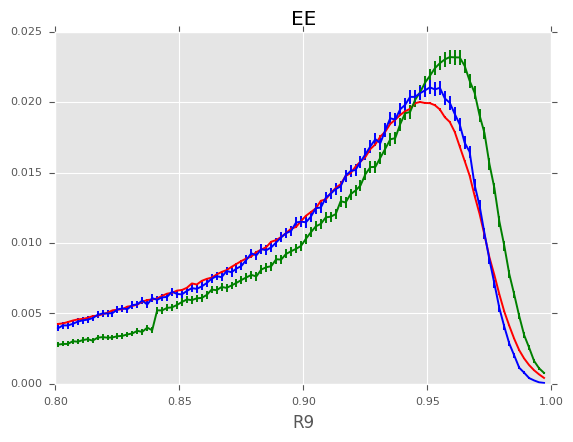

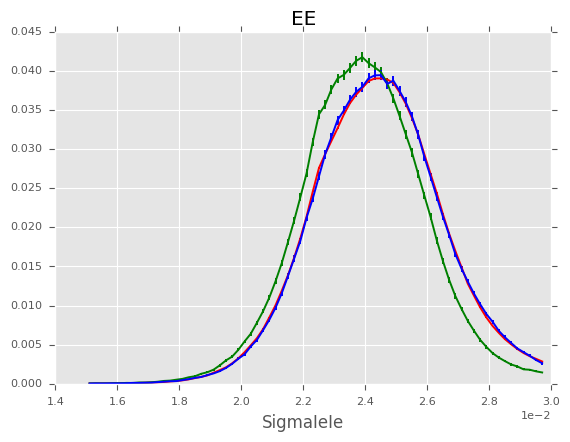

In [30]:
dfm=dfmcEE
dfd=dfdataEE
sec= "EE"
name0="AllPeriods_Integrated_"+sec
Xlist=["R9","SigmaIeIe"]#","ChIso03","ScEta","Pt","rho","Phi"]
print Xlist
for yvar in Xlist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.arange(0.0,1.0,0.0015)
            rv2 = np.arange(0.8,1.0,0.0015)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv2 = np.arange(0.004,0.013,0.0002)
            #rv2 = np.arange(0.015,0.030,0.0002)
        else:
            rv = np.arange(0.014,0.020,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plot.plotHistErr(dfd[yvar], rv2, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv2,Weight=dfm["weight"], Color="g") 
    plot.plotHistErr(dfm[yvar+"_corr"], rv2,Weight=dfm["weight"], Color="b")
    ax.set_title(sec)
    name= name0+yvar
    fig.savefig('FINALPLOTS/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)
    



plotting  R9


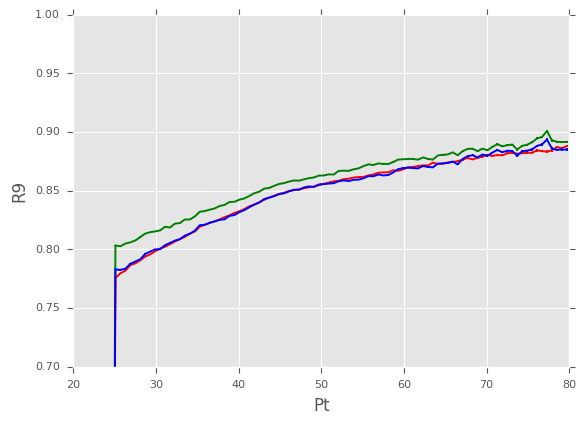

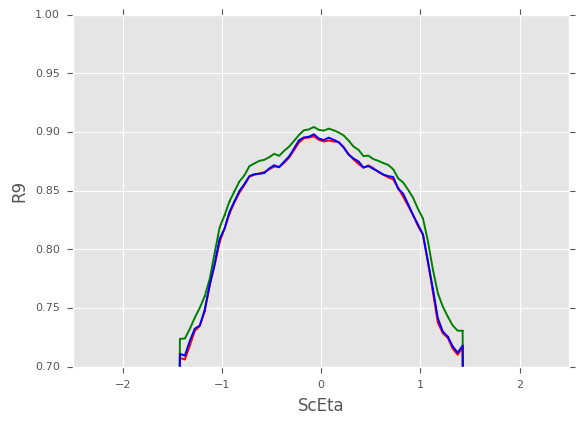

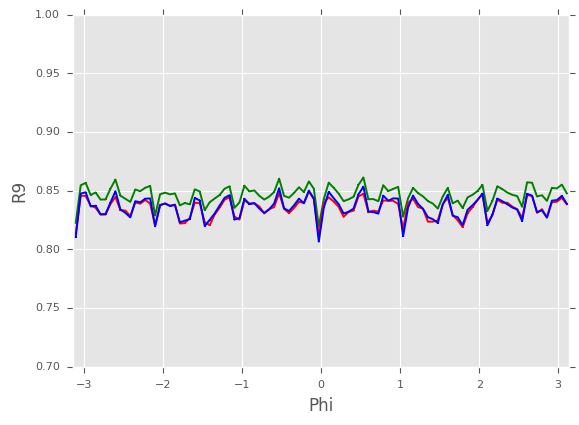

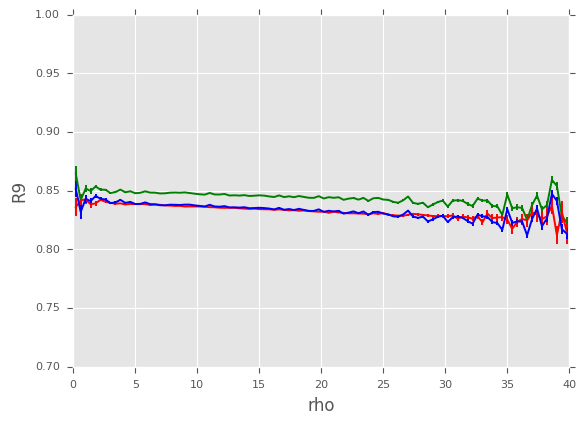

In [35]:


# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Profiles_"+sec
section= "section3"

for yvar in ["R9"]:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.01
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        name= name0+yvar+"vs"+xvar
        fig.savefig('FINALPLOTS/'+name+'.png', dpi=fig.dpi)

plotting  SigmaIeIe
plotting  EtaWidth


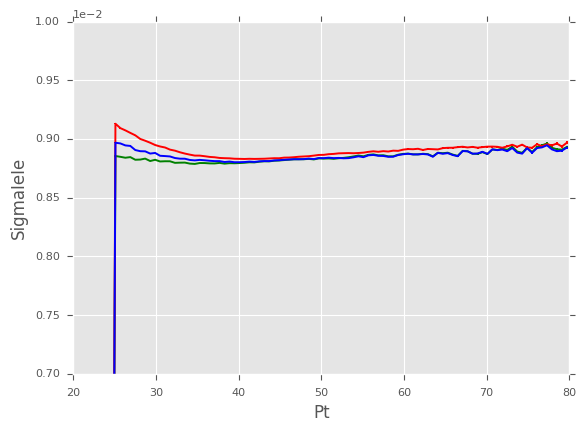

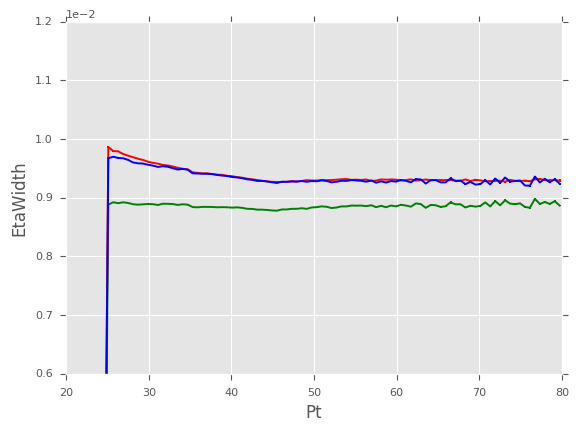

In [32]:


# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Profiles_"+sec
section= "section3"

for yvar in ["SigmaIeIe","EtaWidth"]:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.01
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in ["Pt"]:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        name= name0+yvar+"vs"+xvar
        fig.savefig('FINALPLOTS/'+name+'.png', dpi=fig.dpi)

plotting  R9


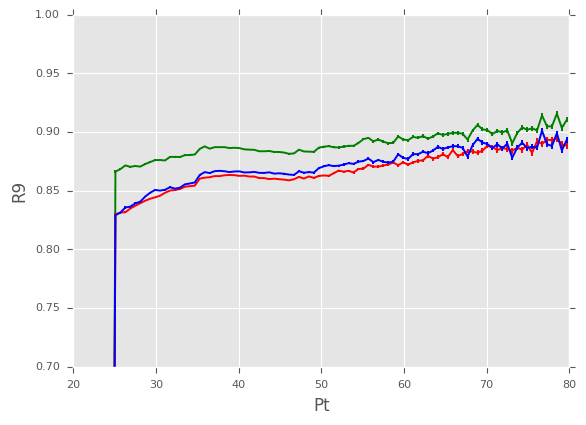

In [34]:


# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEE
dfd=dfdataEE
sec= "EE"
name0="AllPeriods_Profiles_"+sec
section= "section3"

for yvar in ["R9"]:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.01
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in ["Pt"]:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        name= name0+yvar+"vs"+xvar
        fig.savefig('FINALPLOTS/'+name+'.png', dpi=fig.dpi)